# Calcul des diagrammes de plongement

Le but est de calculer le diagramme de plongement et de mettre en évidence une masse maximun. On se place dans le cas où l'étoile est homogène. Le système TOV s'intégre alors et on a la forme de l'espace temps. 
Dans ce cas, la géométrie de l'espace temps ne dépend que de deux paramètres (R,M) ou (M, $\Xi$). Le diagramme de plongement consiste alors à "plonger" l'espace temps à 4 dimensions dans un espace à 3 dimensions. 

In [126]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

%matplotlib notebook

## Tracé du diagramme : 

### 1) Intégration du système TOV 

$$ m(r)	=\begin{cases}
M(r/R)^{3} & pour\,\,r\leq R\\
M & pour\,\,r\geq R
\end{cases}\\
P(r)	=\begin{cases}
\rho_{c}\frac{\sqrt{1-2\Xi(r/R){{}^2}}-\sqrt{1-2\Xi}}{3\sqrt{1-2\Xi}-\sqrt{1-2\Xi(r/R){{}^2}}} & pour\,\,r\leq R\\
0 & pour\,\,r\geq R
\end{cases}\\
\Phi(r)	=\begin{cases}
c{{}^2}ln\left(\frac{3\sqrt{1-2\Xi}-\sqrt{1-2\Xi(r/R){{}^2}}}{2}\right) & pour\,\,r\leq R\\
\frac{c{{}^2}}{2}ln\left(1-2\Xi\frac{R}{r}\right) & pour\,\,r\geq R
\end{cases} $$ 


La métrique en coordonnée de Schwarschild s'exprime avec : 
$$ N(r)=e^{\frac{\Phi(r)}{c^{2}}}$$ et $$ A(r)=\frac{1}{\sqrt{1-\frac{2Gm(r)}{rc^{2}}}}$$

### 2) Fonction à tracer pour le diagramme 

La fonction f à tracer vérifie alors (cf document latex) : 

$$
1+\left(\frac{\partial f}{\partial r}\right)^{2}=g_{rr}
$$



Pour le diagramme de plongement, on trace la courbe : 
$$
f(r)=\begin{cases}
2R_{S}\sqrt{\frac{r}{R_{s}}-1}+C & pour\,\,r\leq R\\
-\sqrt{\frac{3c^{2}}{8\pi G\rho}-r²}+C & pour\,\,r\geq R
\end{cases}
$$

In [8]:
c = 1
G = 1

def plongement(r, R, M):   #f ne dépend que de r, R, le rayon de l'objet et M sa masse
    rho = M/(4/3 * np.pi * R**3)  #masse volumique 
    R_s = 2 * G * M/c**2  #rayon de Schwarschild
    a = 3*c**2/(8*np.pi*rho*G)   #facteur dans la racine carré à l'intérieur de l'objet
    if r>R:
        return 2 * R_s * np.sqrt(r/R_s-1) -2 * R_s * np.sqrt(R/R_s-1) - np.sqrt(-R**2+a)
    else :
        return -np.sqrt(-r**2+a)

   
# la suite correspond à d'anciens calculs, qui ne sont pas utile pour la suite
"""    
def m(r, R, M):
    if r >=R : return M
    else : return M * (r/R)**3
    
def phi(r, R, M):
    xi = G*M/(R*c**2)
    if r >= R : return c**2 / 2 * np.log(1 - 2 * xi *R/r)
    else : return c**2 * np.log((3*np.sqrt(1 - 2*xi)-np.sqrt(1-2*xi * (r/R)**2))/2)

def P(r, R, M):
    xi = G*M/(R*c**2)
    if r <= R:
        rho = M/(4/3 * np.pi * R**3)
        return rho * c**2 * (np.sqrt(1-2*xi*(r/R)**2)-np.sqrt(1-2*xi))/(3*np.sqrt(1-2*xi) - np.sqrt(1-2*xi*(r/R)**2))
    else : return 0
    
def A(r, R, M):   
    if r >= R:
        R_c = 2 * G * M/c**2
        return -1/np.sqrt(1-R_c/r)
    elif r>0:
        m_r = m(r,R,M)
        #print(1-R_c/r, '   ', r)
        return -1/np.sqrt(1-2*G*m_r/(r * c**2))
"""

"    \ndef m(r, R, M):\n    if r >=R : return M\n    else : return M * (r/R)**3\n    \ndef phi(r, R, M):\n    xi = G*M/(R*c**2)\n    if r >= R : return c**2 / 2 * np.log(1 - 2 * xi *R/r)\n    else : return c**2 * np.log((3*np.sqrt(1 - 2*xi)-np.sqrt(1-2*xi * (r/R)**2))/2)\n\ndef P(r, R, M):\n    xi = G*M/(R*c**2)\n    if r <= R:\n        rho = M/(4/3 * np.pi * R**3)\n        return rho * c**2 * (np.sqrt(1-2*xi*(r/R)**2)-np.sqrt(1-2*xi))/(3*np.sqrt(1-2*xi) - np.sqrt(1-2*xi*(r/R)**2))\n    else : return 0\n    \ndef A(r, R, M):   \n    if r >= R:\n        R_c = 2 * G * M/c**2\n        return -1/np.sqrt(1-R_c/r)\n    elif r>0:\n        m_r = m(r,R,M)\n        #print(1-R_c/r, '   ', r)\n        return -1/np.sqrt(1-2*G*m_r/(r * c**2))\n"

### Courbe de plongement à une seule dimension
Comme la courbe ne dépend que de r, on peut la tracer uniquement en fonction de r pour se rendre compte de quelques phénomènes. On a bien une valeur critique pour $\Xi = \frac{1}{2}$, comme attendu. A cette valeur, la dérivé de f devient infini en $r=R_{S}$.

<IPython.core.display.Javascript object>


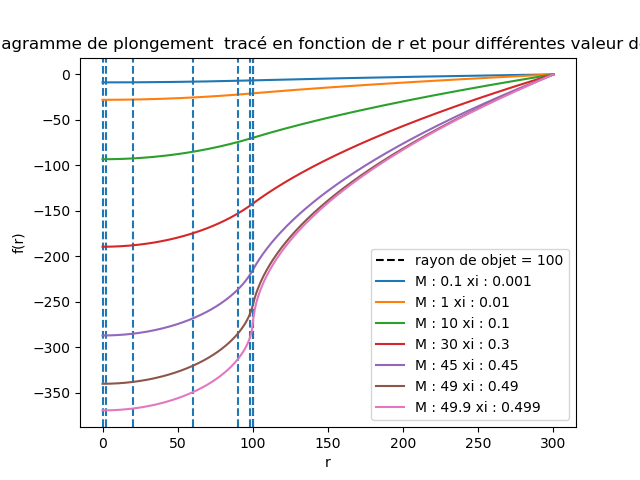

Text(0, 0.5, 'f(r)')

In [8]:
radii = np.linspace(0, 300, 300)
R = 100
plot_M = [0.1, 1, 10, 30, 45, 49, 49.9] 

plt.figure()
plt.axvline(x=R,color='black',linestyle='--', label = 'rayon de objet = ' + str(R) )

for i in range (len(plot_M)):
    M = plot_M[i]
    R_s = 2 * G * M/c**2
    xi = G*M/(R*c**2)
    plt.axvline(x=R_s,linestyle='--')
    z = np.vectorize(plongement)(radii, R, M)-plongement(300, R, M)
    plt.plot(radii, z, label = 'M : ' + str(M) + ' xi : ' + str(round(xi, 3)))
plt.legend()
plt.title("diagramme de plongement  tracé en fonction de r et pour différentes valeur de xi")
plt.show()
plt.xlabel('r')
plt.ylabel('f(r)')

### Graph dans le plan des courbes
On observe bien une compacité maximale au-delà de laquelle l'équilibre n'est plus possible pour $\Xi = \frac{4}{9}$

In [16]:

def graph(R, M):   
    n_radii = 20
    n_angles = 20

    xi = G*M/(R*c**2)
    print(xi, ' xi')
    # Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
    radii_ext = np.linspace(R, 10.0, n_radii)
    radii_int = np.linspace(0, R, n_radii)
    angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

    # Repeat all angles for each radius.
    angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

    # Convert polar (radii, angles) coords to cartesian (x, y) coords.
    # (0, 0) is manually added at this stage,  so there will be no duplicate
    # points in the (x, y) plane.
    X_ext = (radii_ext*np.cos(angles)).flatten()
    Y_ext = (radii_ext*np.sin(angles)).flatten()
    
    X_int = (radii_int*np.cos(angles)).flatten()
    Y_int = (radii_int*np.sin(angles)).flatten()

    # Compute z to make the pringle surface.
    
    z_ext = np.vectorize(plongement)(np.sqrt(np.power(X_ext, 2)+np.power(Y_ext, 2)), R, M)
    z_int = np.vectorize(plongement)(np.sqrt(np.power(X_int, 2)+np.power(Y_int, 2)), R, M)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_trisurf(X_ext, Y_ext, z_ext, linewidth=0.2, antialiased=True, color = 'gray', vmax = -5, vmin = -6)
    ax.plot_trisurf(X_int, Y_int, z_int, linewidth=0.2, antialiased=True, color = 'red')

    plt.show()

widgets.interact_manual(graph, R = widgets.fixed(4) , M = widgets.FloatLogSlider(base = 10, min=-4, max=np.log(4), step = 0.2,  description='Mass'))   

interactive(children=(FloatLogSlider(value=1.0, description='Mass', max=1.3862943611198906, min=-4.0, step=0.2…

<function __main__.graph(R, M)>

## Diagramme de plongement d'une étoile en éffondrement

On suit la technique de la page 854 du livre. 
On prend une métrique de Friedmann sur $[0, a_{m}sin(\xi_{0}) ]$ et ensuite on prolonge pas continuité avec Schwarzschild à l'extérieur de l'étoile.

In [96]:
def plongement_collapse(r, M, a_m, xi_0):  #r : point où on trace la fonction, M : masse, 
    # a_m et xi_0: paramètre de la métrique de Friedmann
    
    R_s = 2 * G * M/c**2  #rayon de Schwarschild
    cstte = -a_m * np.cos(xi_0) -  2 * R_s * np.sqrt(a_m * np.sin(xi_0)/R_s-1) #cstte pour assurer la continuité
    if np.absolute(r) < a_m * np.sin(xi_0) :
        return -a_m * np.sqrt(1-(r/a_m)**2) 
                   
    else :
        return 2 * R_s * np.sqrt(np.absolute(r)/R_s-1) + cstte
    #else :
     #   return -np.sqrt(-r**2+a) - cstte

27.306385610033274  R_s


<IPython.core.display.Javascript object>


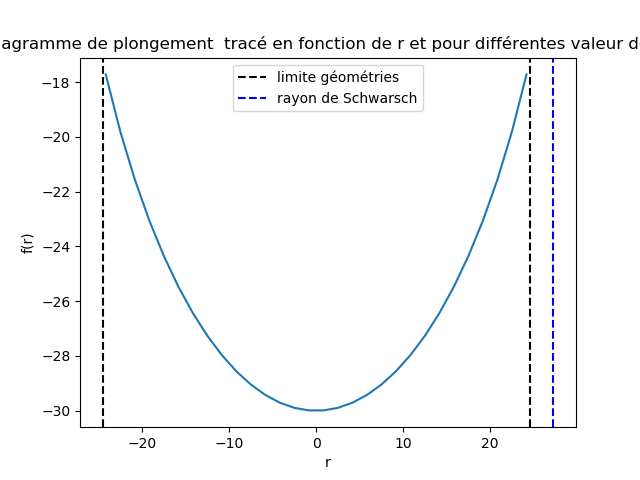

-126.02061315896492
-126.02061315896492


/home/romain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/romain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


In [94]:
radii = np.linspace(-500, 500, 600)
a_max = 50
xi_0 = 0.96 
a_m = 30
M = a_max * np.sin(xi_0)/3
G, c = 1, 1
R_s = 2 * G * M/c**2  #rayon de Schwarschild
print(R_s, ' R_s')
    
plt.figure()
plt.axvline(x=a_m * np.sin(xi_0),color='black',linestyle='--', label = 'limite géométries')
plt.axvline(x=-a_m * np.sin(xi_0),color='black',linestyle='--')

plt.axvline(x=R_s,color='b',linestyle='--', label = 'rayon de Schwarsch')

z = np.vectorize(plongement_collapse)(radii, M, a_m, xi_0)

plt.plot(radii, z)
plt.legend()
plt.title("diagramme de plongement  tracé en fonction de r et pour différentes valeur de xi")
plt.show()
plt.xlabel('r')
plt.ylabel('f(r)')
plt.show()

In [121]:
def free_fall(r_max, M):
    def r(eta):
        return r_max/2 * (1 + np.cos(eta))
    def tau(eta):
        return np.sqrt(r_max**3 / (8*M)) * (eta + np.sin(eta))
    def t(eta):
        return 2*M*np.absolute( (np.sqrt(r_max/(2*M)-1) + np.tan(eta/2)) / (np.sqrt(r_max/(2*M)-1) - np.tan(eta/2))) + 2*M*np.sqrt(r_max/(2*M)-1) * (eta + (r_max/(4*M) * (eta + np.sin(eta))))


    eta = np.linspace(0, np.pi, 100)
    Tau = tau(eta)
    R = r(eta)
    T = t(eta)

    plt.figure()
    plt.plot(R, Tau)
    plt.axvline(x=2*M,color='black',linestyle='--', label = 'R_S') 
    plt.xlabel('R')
    plt.title("Chute libre d'une particule matérielle dans un trou noir de Schwarzschild")


-61.41848493043782


<IPython.core.display.Javascript object>


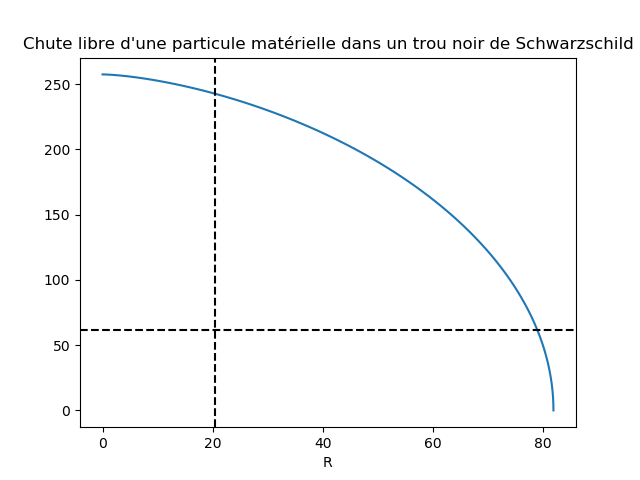

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='eta', max=3.141592653589793…

<function __main__.animation_plongement(eta)>

In [138]:
radii = np.linspace(-500, 500, 600)
a_max = 100
xi_0 = 0.96
M = a_max * np.sin(xi_0)/8
R_s = 2 * M  #rayon de Schwarschild
R_i = a_max * np.sin(xi_0)
t_ff = np.pi * np.sqrt(R_i**3/(8*M))
eta_c = np.arccos(1-4*M/R_i) - np.pi   #eta tq le rayon vaut R_S
t_c = a_max/2 * (eta_c-np.sin(eta_c))

print(t_c)

def animation_plongement(eta):   
    
    a_m = a_max/2 * (1-np.cos(eta + np.pi))
    t = a_max/2 * (eta-np.sin(eta))
    
    print(t, ' collapse time')
    print(M, ' mass')
    print(R_s, ' R_s')
    print(t_ff, ' t_ff')
    plt.figure()
    plt.axvline(x=a_m * np.sin(xi_0),color='black',linestyle='--', label = 'limite géométries')
    plt.axvline(x=-a_m * np.sin(xi_0),color='black',linestyle='--')

    plt.axvline(x=R_s,color='b',linestyle='--', label = 'rayon de Schwarsch')

    z = np.vectorize(plongement_collapse)(radii, M, a_m, xi_0)

    plt.plot(radii, z)
    plt.legend()
    plt.title("étoile en effondrement à " + str(t))
    plt.show()
    plt.xlabel('r')
    plt.ylabel('f(r)')
    plt.show()
free_fall(R_i, M)
plt.axhline(y=-t_c,color='black',linestyle='--', label = 't_c') 
plt.show()
widgets.interact(animation_plongement, eta = widgets.FloatSlider(min = 0, max = np.pi, step = 0.01, continuous_update=False, description='eta'))